## Patient Initial Stay Duration Predictor using Linear Regression Modeling

Research Question:
  Is it possible to create a linear regression model representing the tenure of customers using other continuous and categorical variables within the dataset?

Import necessary python packages for data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msg
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
!pip install prince
from prince import MCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 5.5 MB/s eta 0:00:00


Load dataset

In [2]:
data = pd.read_csv('churn_clean.csv')
data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


Observe Dataset Characteristics

In [3]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

Extract Feature Columns of interest and Target Column

In [5]:
continuous = ['Age', 'Income', 'Outage_sec_perweek', 'Bandwidth_GB_Year', 'MonthlyCharge']
categorical =['Churn', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'PaymentMethod', 'PaperlessBilling', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection']
features = continuous + categorical
target = ['Tenure']
data = data[features + target]

Check for any missing values

Age                   0
Income                0
Outage_sec_perweek    0
Bandwidth_GB_Year     0
MonthlyCharge         0
Churn                 0
Marital               0
Gender                0
Techie                0
Contract              0
Port_modem            0
Tablet                0
Phone                 0
Multiple              0
OnlineSecurity        0
OnlineBackup          0
PaymentMethod         0
PaperlessBilling      0
StreamingMovies       0
StreamingTV           0
TechSupport           0
DeviceProtection      0
Tenure                0
dtype: int64


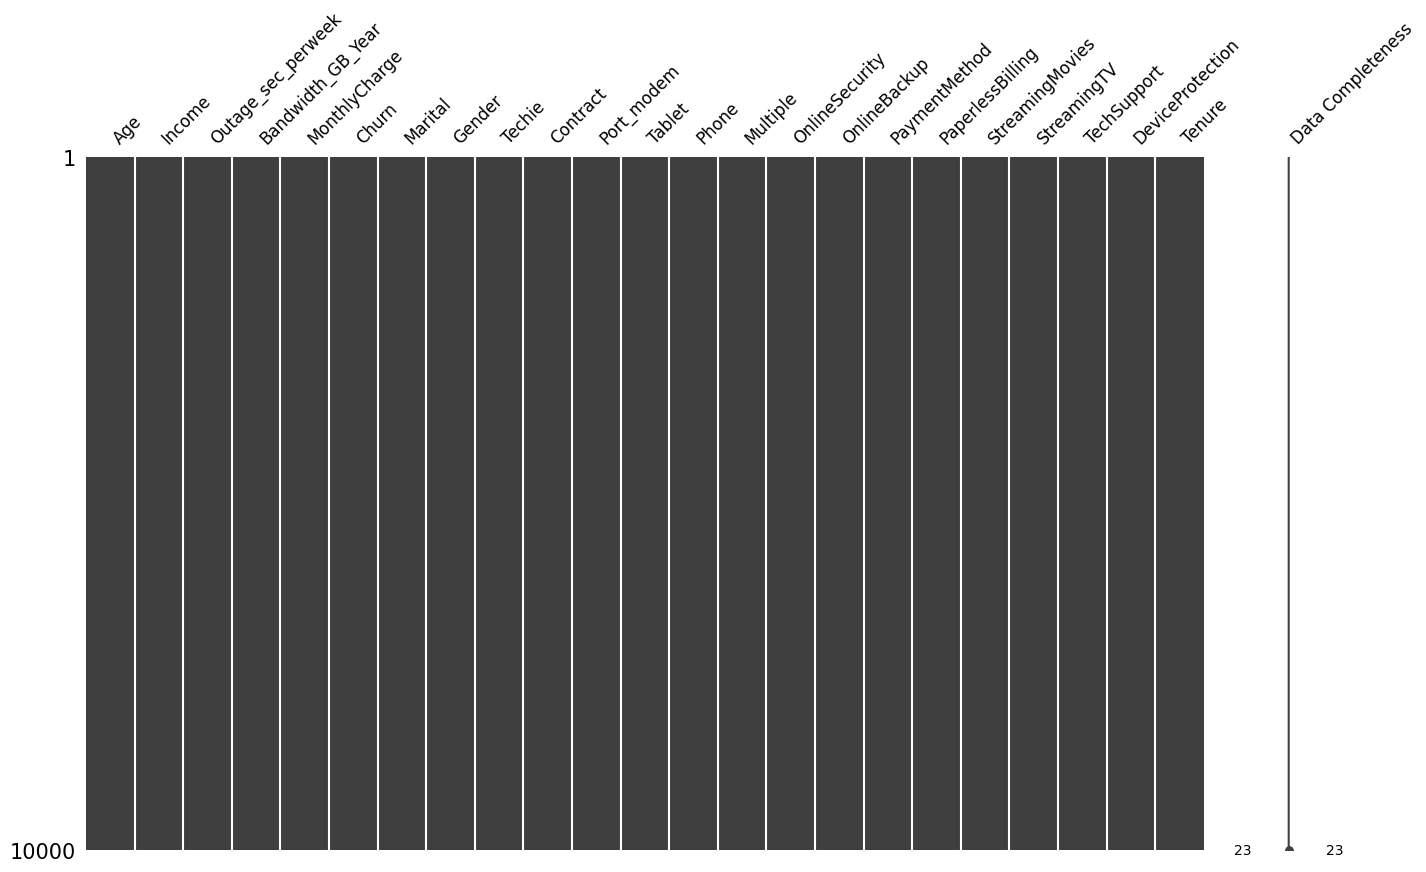

In [6]:
msg.matrix(data, figsize=(16,9), fontsize=12, labels=True)
missing_columns = data.isnull().sum()
print(missing_columns)

#Data Transformation
The goal of the following data transformation process is to ensure that all feature variables undergo feature reduction as well as any extra steps required to prepare the data for such processes.

Principal Component Analysis will be used for feature reduction with the continuous features while Multi Correspondance Analysis wil be used for the categorical features.

While PCA can be applied to the continuous variables right off the bat, the categorical varaibles will have to undergo hot-encoding via pd.get_dummies prior to the application of MCA for feature reduction.

##Continuous Variables

Summary Statistics for Each Variables Used for Analysis and Distribution Visualizations

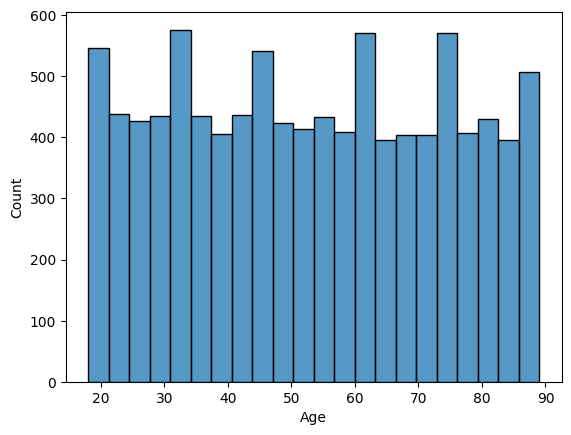

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


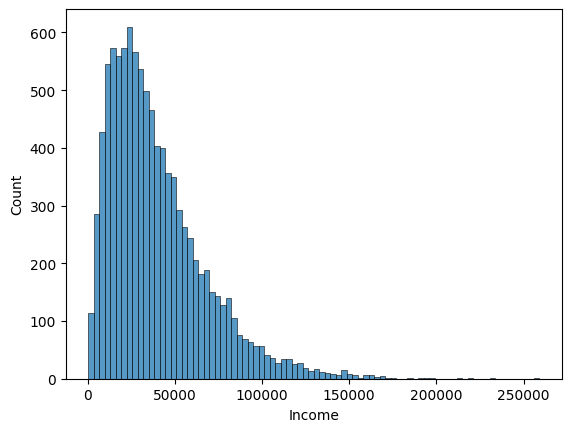

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


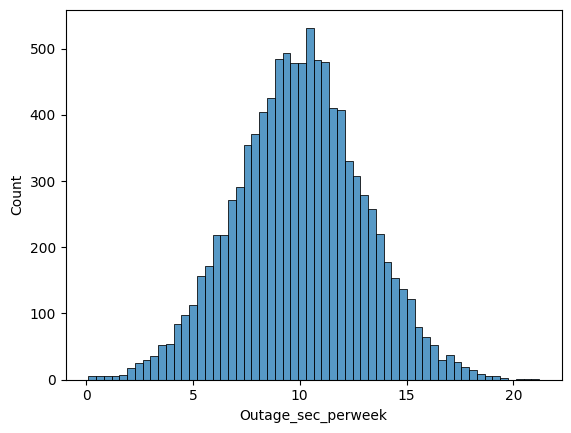

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64


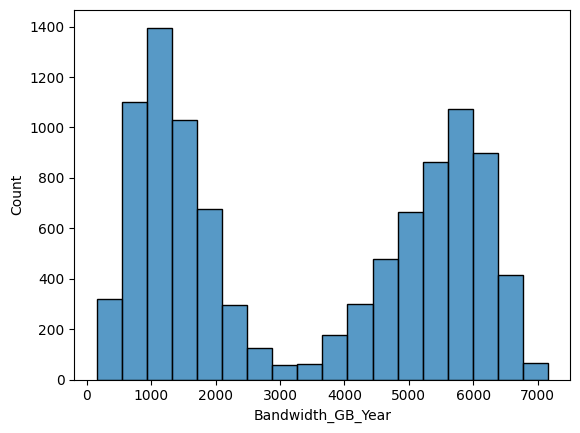

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64


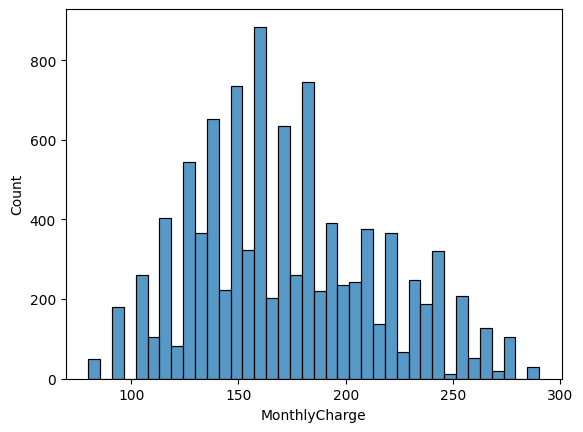

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


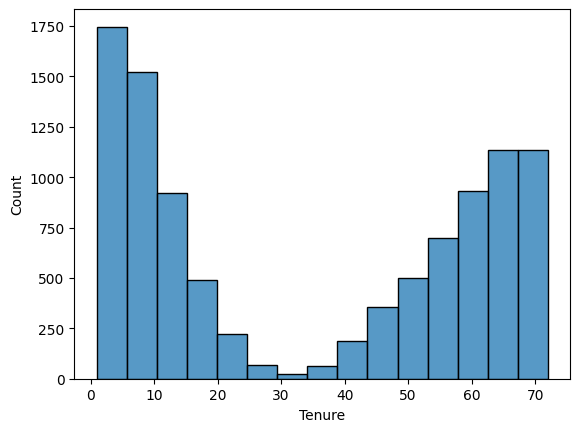

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


In [17]:
for column in continuous + target:
  sns.histplot(data, x=column)
  plt.show()
  print(data[column].describe())

Bivariate Visualizations against Target Variable

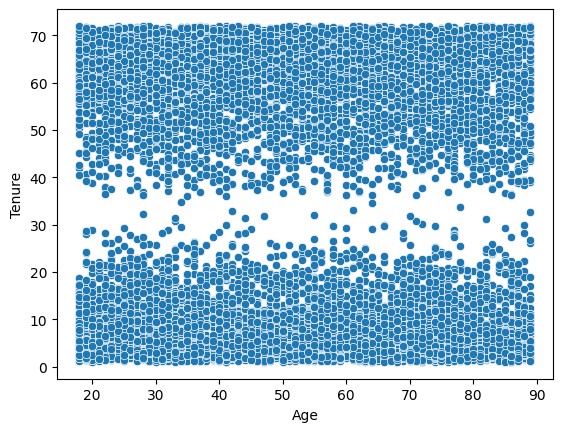

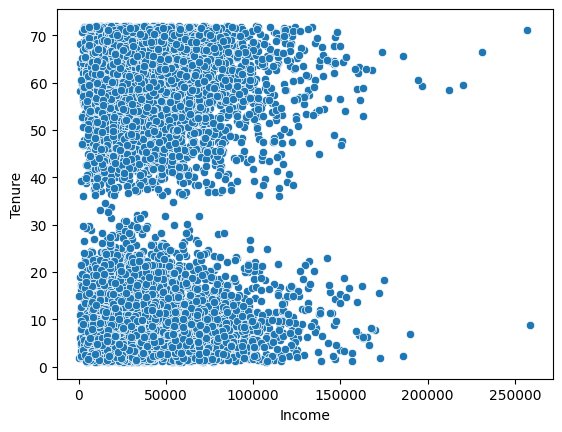

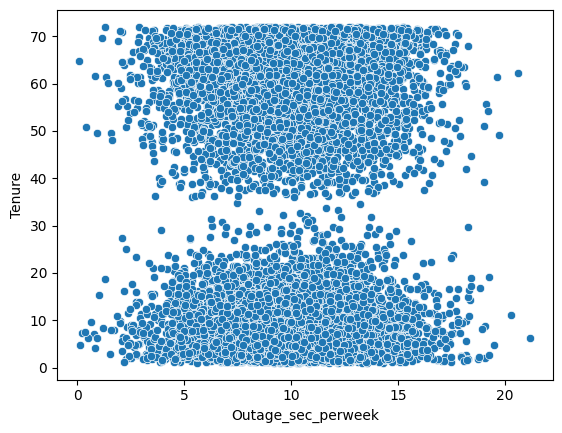

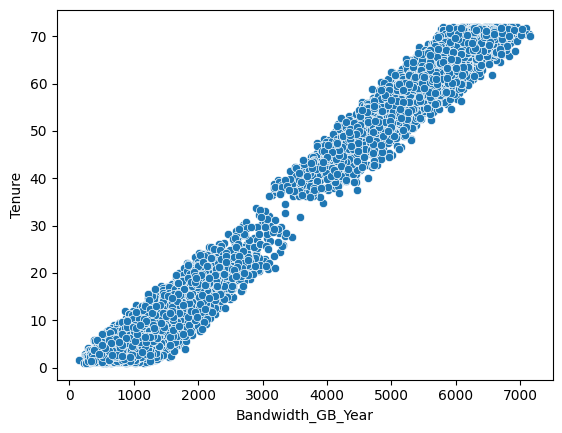

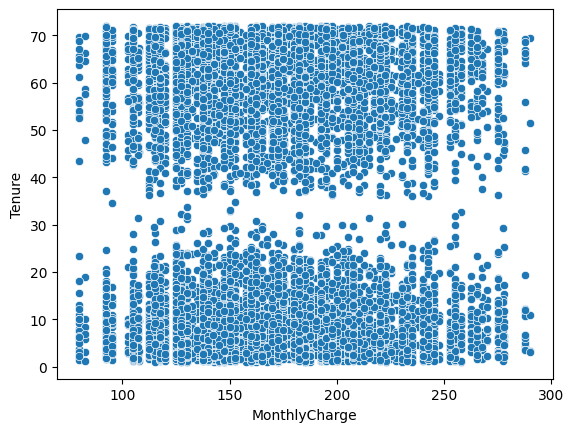

In [8]:
for column in continuous:
    if column != target[0]:
        sns.scatterplot(x = column, y = target[0], data = data)
        plt.show()

#Categorical Variables

Summary Statistics for feature variables Used for Analysis and Distribution Visualizations

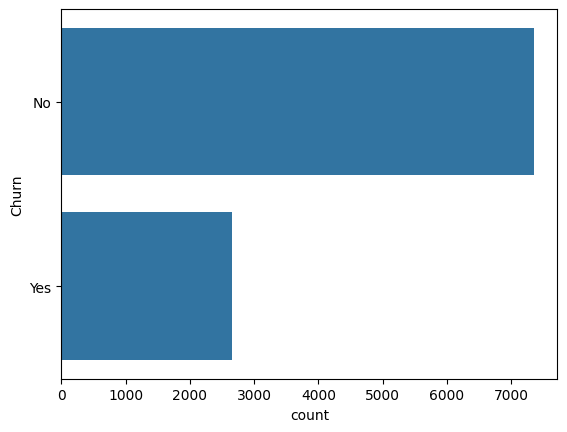

  Churn  Count
0    No   7350
1   Yes   2650


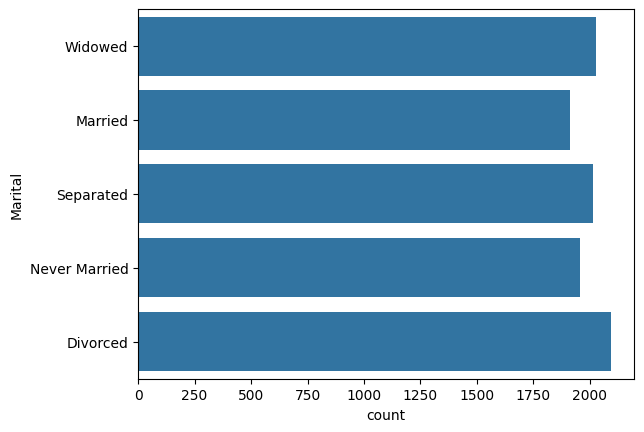

         Marital  Count
0       Divorced   2092
1        Married   1911
2  Never Married   1956
3      Separated   2014
4        Widowed   2027


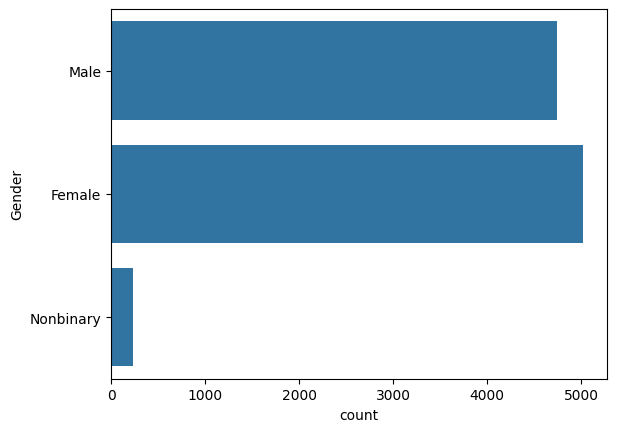

      Gender  Count
0     Female   5025
1       Male   4744
2  Nonbinary    231


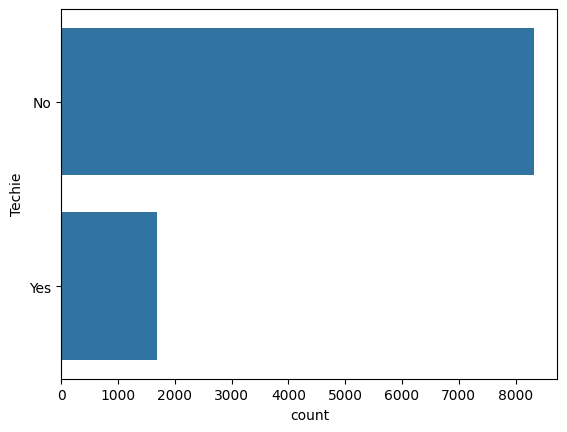

  Techie  Count
0     No   8321
1    Yes   1679


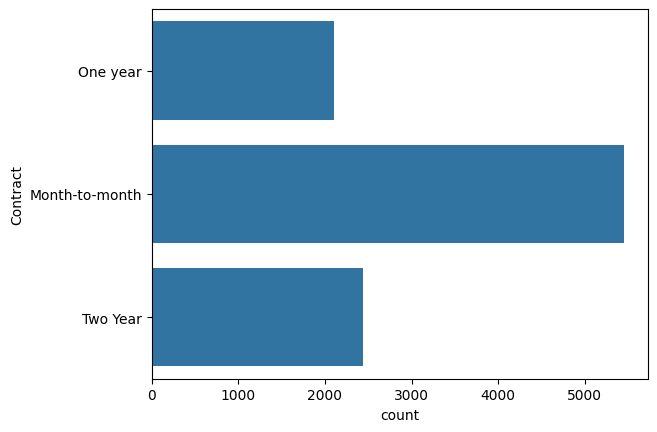

         Contract  Count
0  Month-to-month   5456
1        One year   2102
2        Two Year   2442


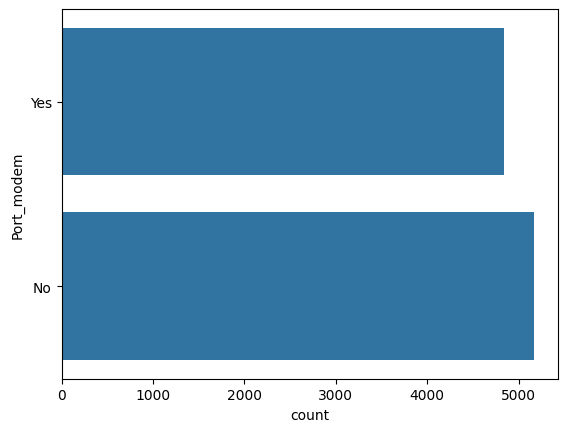

  Port_modem  Count
0         No   5166
1        Yes   4834


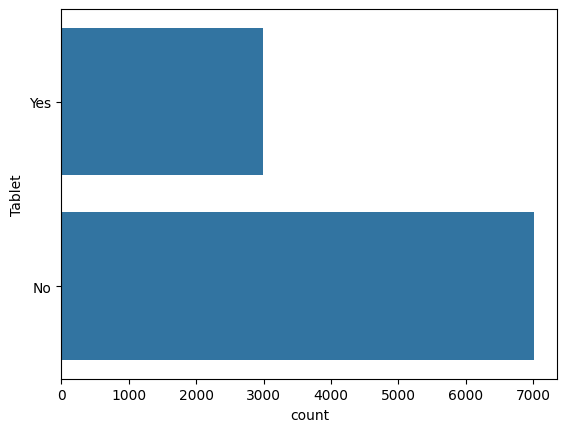

  Tablet  Count
0     No   7009
1    Yes   2991


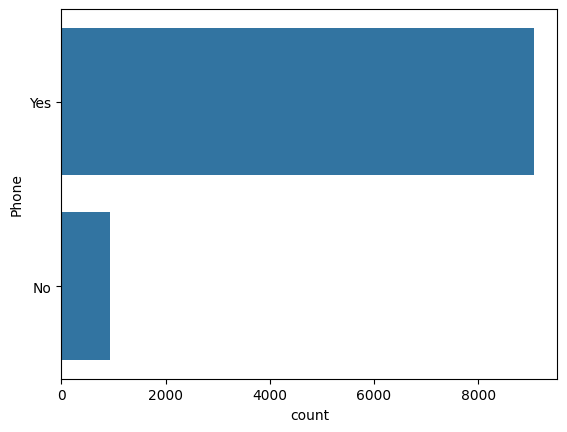

  Phone  Count
0    No    933
1   Yes   9067


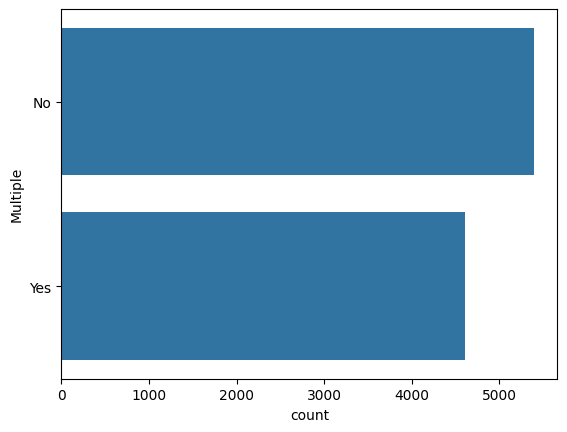

  Multiple  Count
0       No   5392
1      Yes   4608


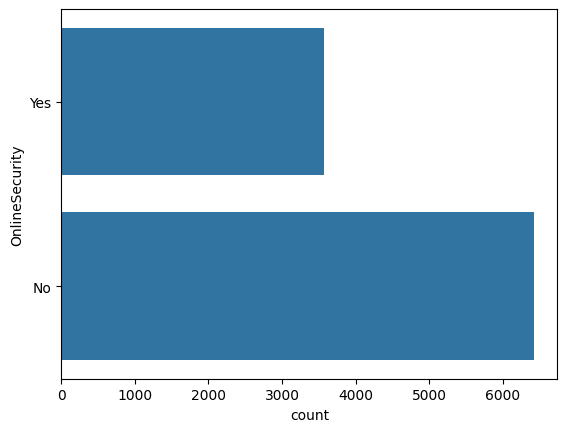

  OnlineSecurity  Count
0             No   6424
1            Yes   3576


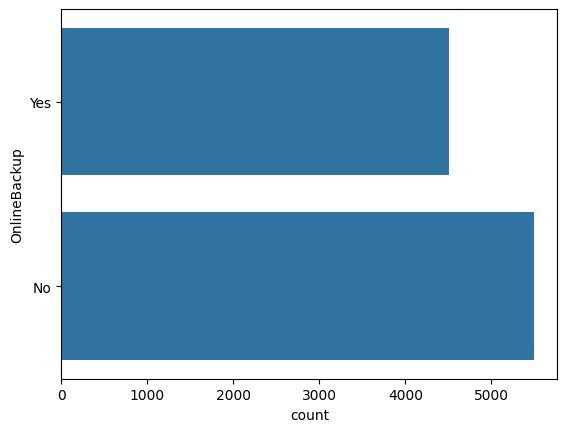

  OnlineBackup  Count
0           No   5494
1          Yes   4506


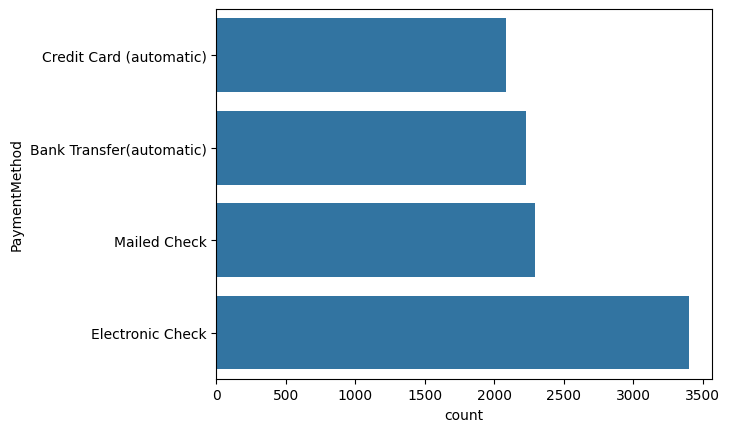

              PaymentMethod  Count
0  Bank Transfer(automatic)   2229
1   Credit Card (automatic)   2083
2          Electronic Check   3398
3              Mailed Check   2290


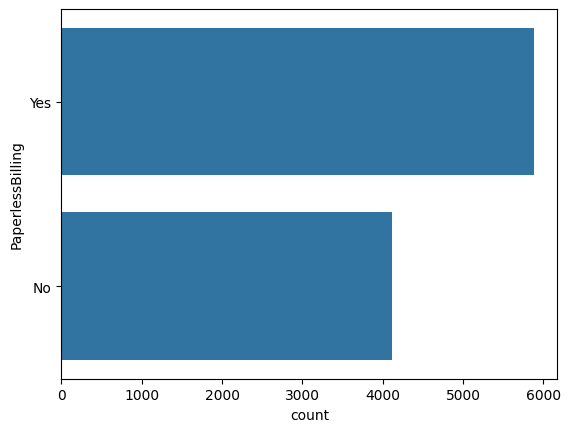

  PaperlessBilling  Count
0               No   4118
1              Yes   5882


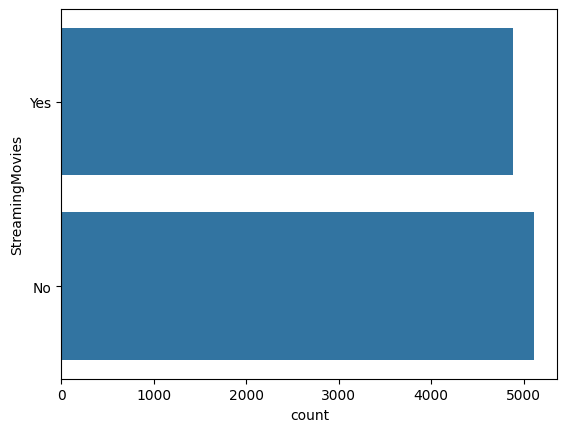

  StreamingMovies  Count
0              No   5110
1             Yes   4890


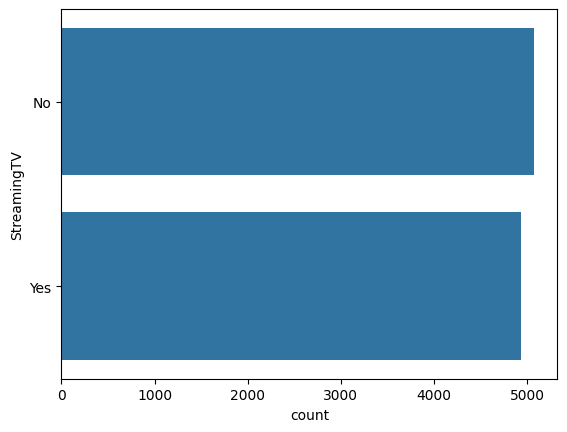

  StreamingTV  Count
0          No   5071
1         Yes   4929


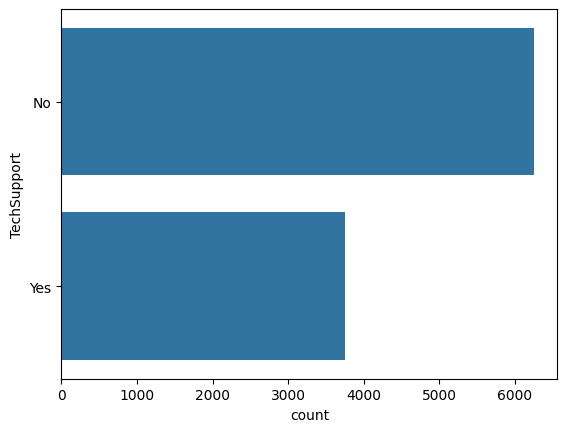

  TechSupport  Count
0          No   6250
1         Yes   3750


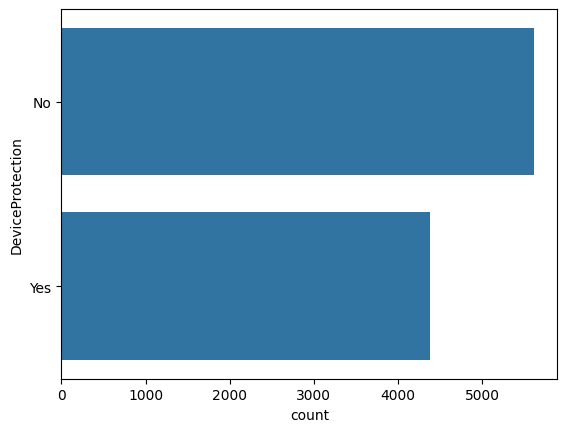

  DeviceProtection  Count
0               No   5614
1              Yes   4386


In [9]:
for column in categorical:
  ax = sns.countplot(y=column, data=data)
  plt.show()
  print(data.groupby([column]).size().reset_index(name='Count'))

Bivariate Visualizations against Target Variable

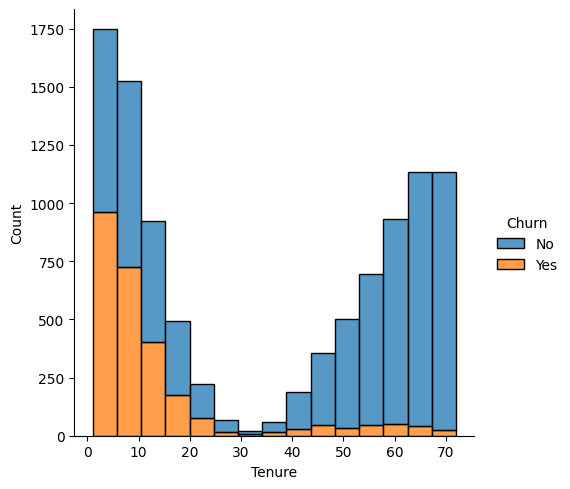

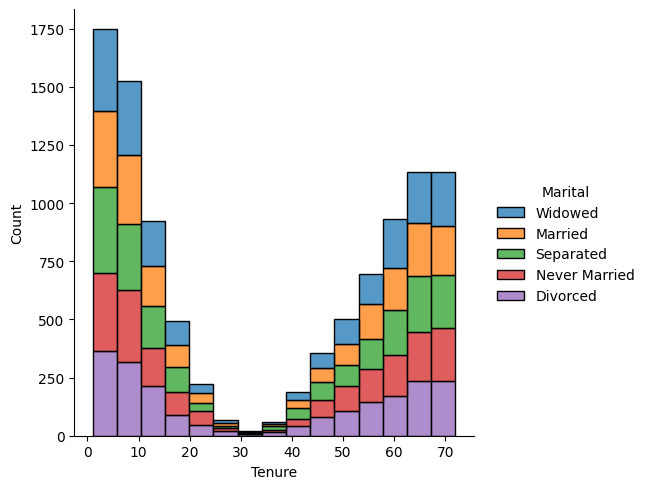

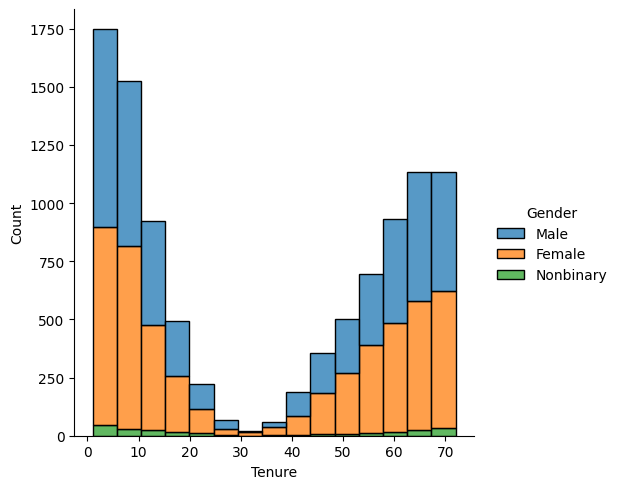

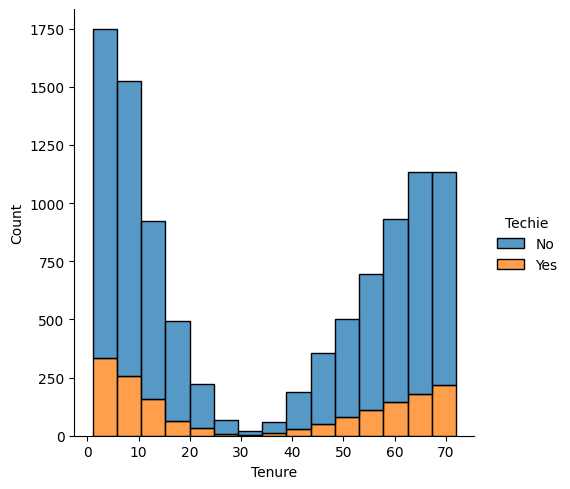

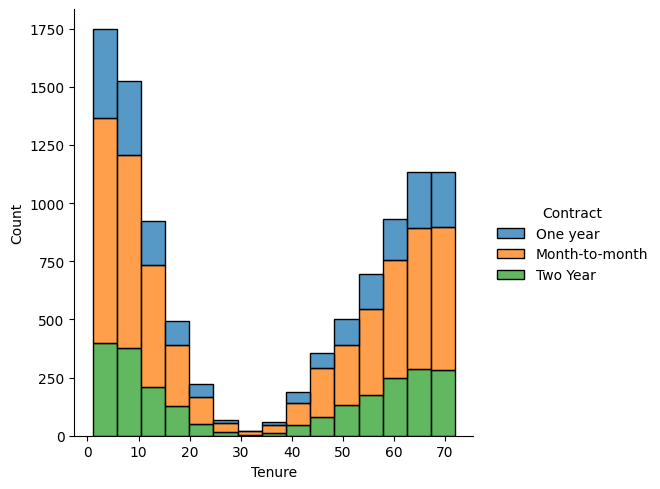

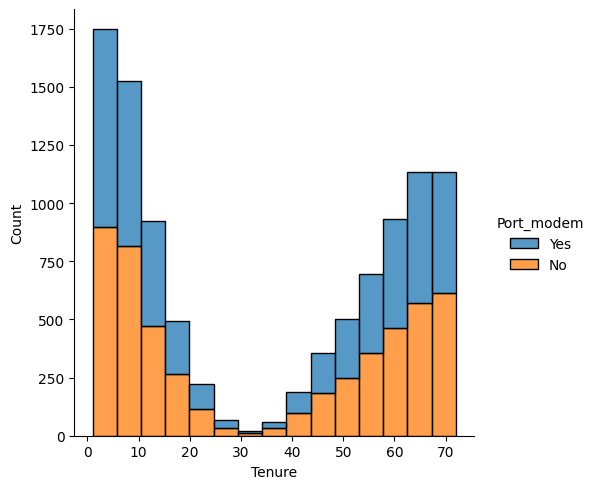

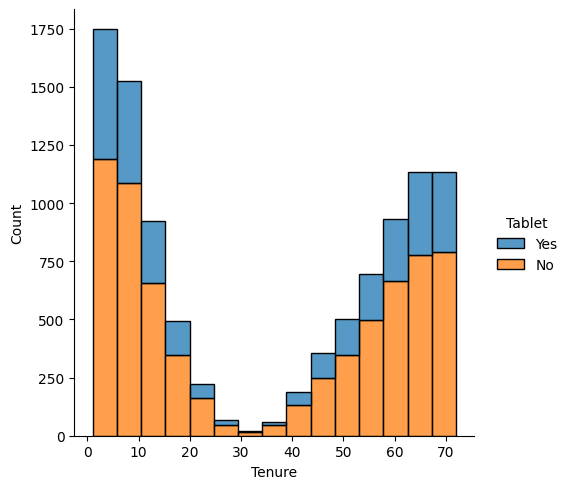

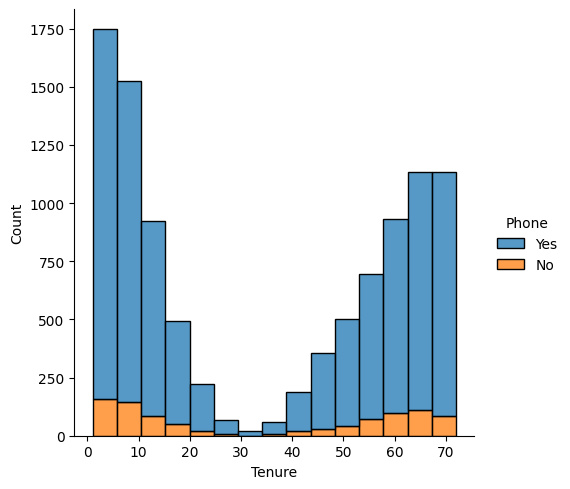

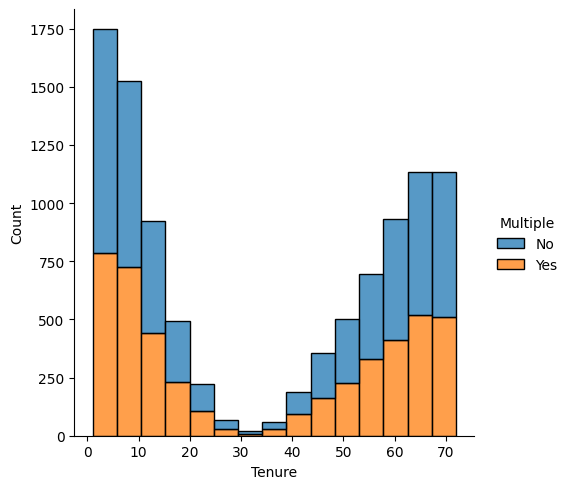

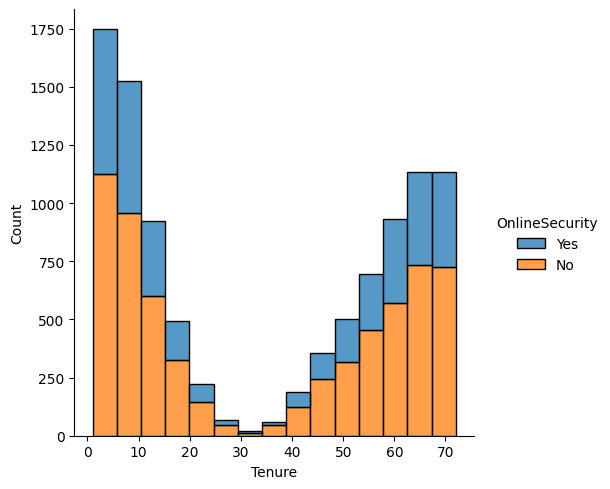

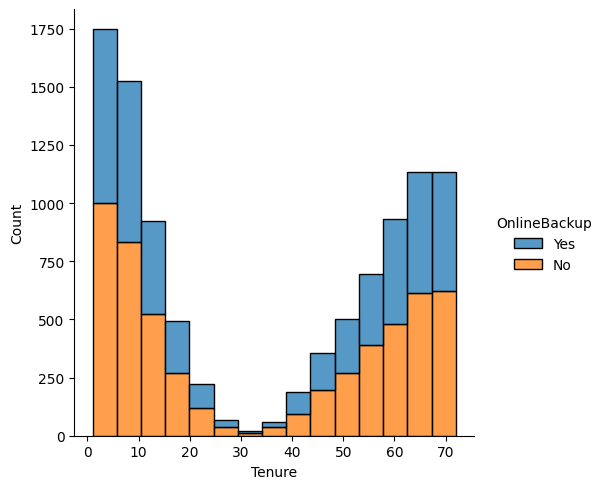

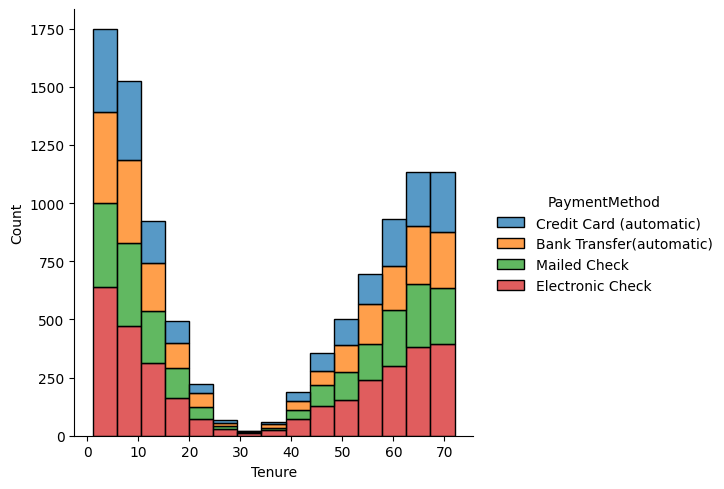

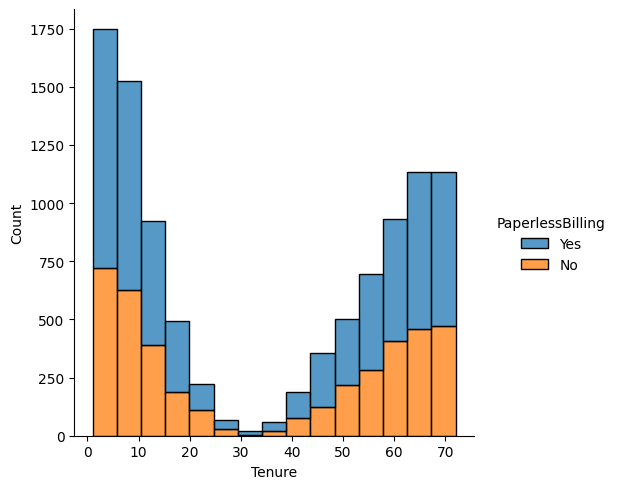

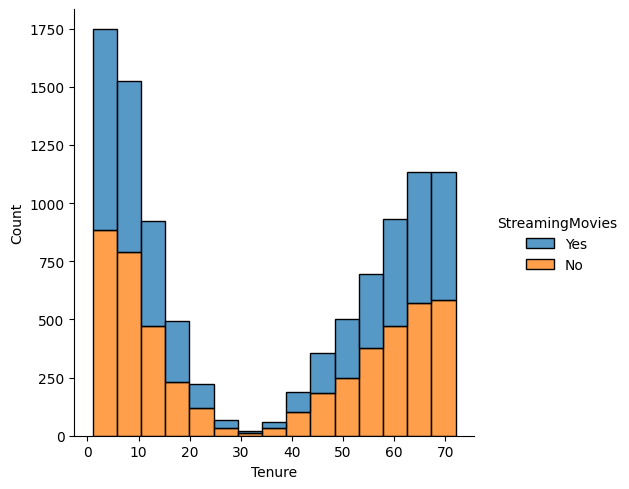

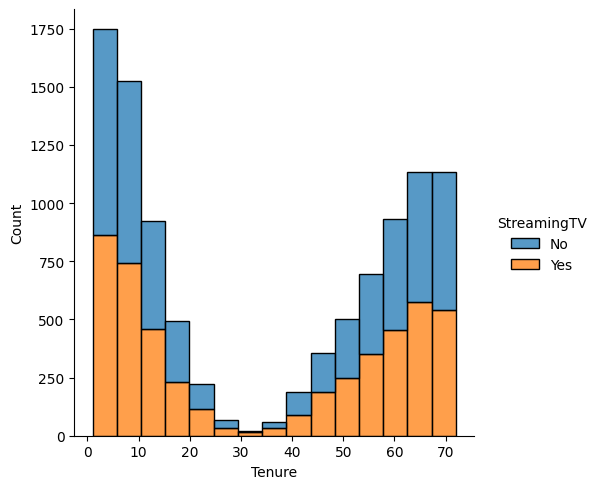

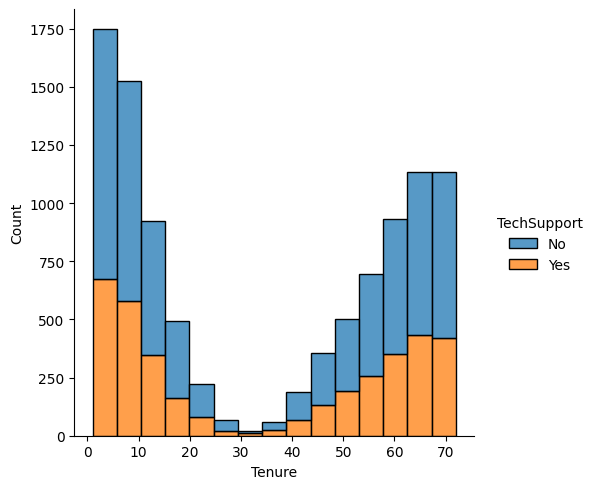

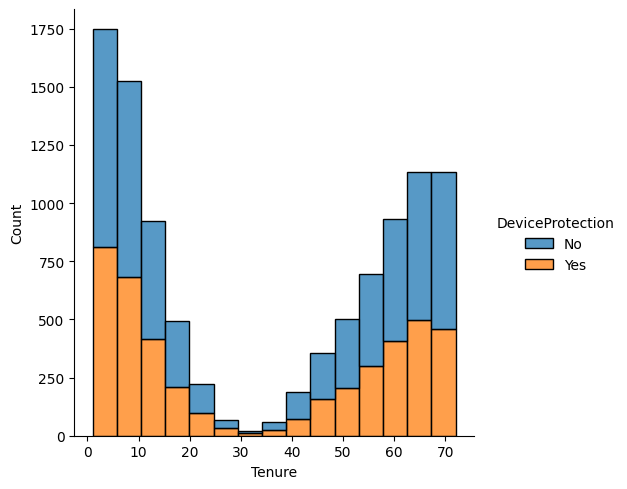

In [10]:
for column in categorical:
    sns.displot(data=data, x=target[0], hue=column, multiple = 'stack')
    plt.show()

#Initial Model


Hot encode categorical variables using pd.get_dummies in preparation for fitting the initial multiple linear regression model

In [11]:
hot_categorical_data = pd.get_dummies(data[categorical], columns = categorical, drop_first=True, dtype='int')
hot_categorical = hot_categorical_data.columns

Fit Initial Model to selected feattures

In [12]:
X_initial = sm.add_constant(pd.concat([data[continuous], hot_categorical_data], axis=1))
y = data[target]
model_initial = sm.OLS(y, X_initial).fit()
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.027e+04
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:57:17   Log-Likelihood:                -23080.
No. Observations:               10000   AIC:                         4.622e+04
Df Residuals:                    9970   BIC:                         4.644e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -6.4657      0.224    -28.903      0.000      -6.904      -6.027
Age                                       0.0411      0.001     34.832      0.000       0.039       0.043
Income                                -1.649e-06   8.65e-07     -1.906      0.057   -3.34e-06    4.67e-08
Outage_sec_perweek                        0.0087      0.008      1.061      0.289      -0.007       0.025
Bandwidth_GB_Year                         0.0119   1.33e-05    898.415      0.000       0.012       0.012
MonthlyCharge                             0.0318      0.002     20.577      0.000       0.029       0.035
Churn_Yes                                -1.6444      0.075    -21.866      0.000      -1.792      -1.497
Marital_Married                           0.0477      0.077      0.618      0.537      -0.104       0.199
Marital_Never Married                     0.0883      0.077      1.151      0.250      -0.062       0.239
Marital_Separated                         0.1431      0.076      1.880      0.060      -0.006       0.292
Marital_Widowed                           0.1866      0.076      2.453      0.014       0.038       0.336
Gender_Male                              -0.7946      0.049    -16.073      0.000      -0.891      -0.698
Gender_Nonbinary                          0.2599      0.164      1.583      0.113      -0.062       0.582
Techie_Yes                                0.0750      0.066      1.144      0.252      -0.053       0.203
Contract_One year                        -0.4428      0.065     -6.808      0.000      -0.570      -0.315
Contract_Two Year                        -0.4594      0.062     -7.407      0.000      -0.581      -0.338
Port_modem_Yes                            0.0315      0.049      0.645      0.519      -0.064       0.127
Tablet_Yes                               -0.0031      0.053     -0.057      0.954      -0.108       0.101
Phone_Yes                                 0.0192      0.084      0.229      0.819      -0.145       0.184
Multiple_Yes                             -1.7342      0.071    -24.392      0.000      -1.874      -1.595
OnlineSecurity_Yes                       -1.0361      0.051    -20.258      0.000      -1.136      -0.936
OnlineBackup_Yes                         -1.7456      0.060    -28.924      0.000      -1.864      -1.627
PaymentMethod_Credit Card (automatic)     0.1499      0.074      2.016      0.044       0.004       0.296
PaymentMethod_Electronic Check            0.1151      0.067      1.729      0.084      -0.015       0.246
PaymentMethod_Mailed Check                0.0748      0.073      1.030      0.303      -0.068       0.217
PaperlessBilling_Yes                      0.0619      0.050      1.248      0.212      -0.035       0.159
Streaming

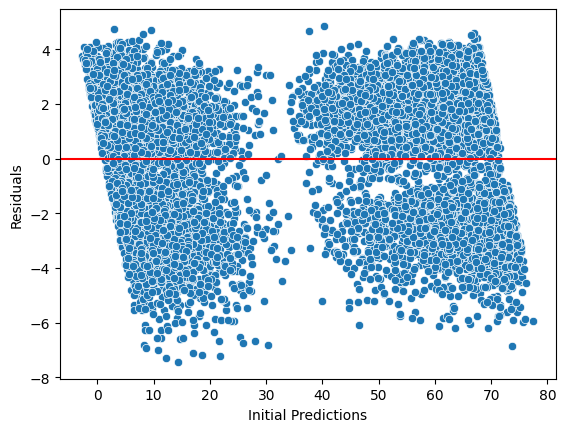

In [13]:
initial_predictions = model_initial.predict(X_initial)
residuals = data[target[0]] - initial_predictions
residual_data = pd.DataFrame({'Initial Predictions': initial_predictions, 'Residuals': residuals})
sns.scatterplot(data= residual_data, x='Initial Predictions', y='Residuals')
plt.axhline(y=0, color="red")
plt.show();

In [14]:
print(f'Root Mean Squared Residuals: {np.sqrt(model_initial.mse_resid)}')

Root Mean Squared Residuals: 2.436557518852419


#Initial Model Summary Analysis
The intial model had an R-squared value of .992 which is indicates that it is able to account for 99.2% of the variance within the dataset.

Another Metric that can be addressed is the residual standard error, which is documented above to be around 2.43. This metric communicates that the average error the models predictions may contain are approximately 2.43 months off of the true values. Which when taking into consideration that the range of the 'Tenure' data is from 1 to 71 months, and that 2.43 is well below the standard deviation (26.44), making this model reasonably reliable to use for business purposes.

As an initial model, this is a fantastic place to start in terms of the model accuracy. However, in efforts to optimize this model, a feature reduction process will be undergone in order to see if the simliar results can be achieved with less features for the sake of efficiency.

#Feature Reduction
##Continuous Variables

Standardization of continuous variables and creation of covariance matrix with heatmap as visual aid

,Age,Income,Outage_sec_perweek,Bandwidth_GB_Year,MonthlyCharge
Age,1.000100,-0.004091,-0.008048,-0.014725,0.010730
Income,-0.004091,1.000100,-0.010012,0.003674,-0.003014
Outage_sec_perweek,-0.008048,-0.010012,1.000100,0.004176,0.020498
Bandwidth_GB_Year,-0.014725,0.003674,0.004176,1.000100,0.060412
MonthlyCharge,0.010730,-0.003014,0.020498,0.060412,1.000100


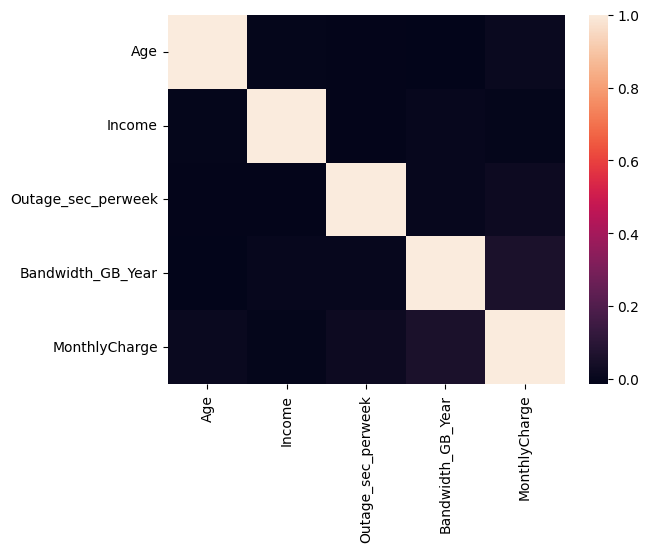

In [18]:
standardized = StandardScaler().set_output(transform='pandas').fit_transform(data[continuous])
covariance_matrix = standardized.cov()
sns.heatmap(covariance_matrix, annot=False)
covariance_matrix

## Perform Principal Component Analysis on feature columns to reduce dimensionality within the dataset


Fit a PCA object to the current set of features

In [19]:
pca = PCA(n_components=len(continuous), random_state=0)
pca.set_output(transform='pandas').fit_transform(standardized)
PCA_matrix = pd.DataFrame(pca.components_.T, columns = range(1, len(continuous) + 1), index=continuous)
PCA_matrix

,1,2,3,4,5
Age,-0.068246,-0.367080,0.841391,0.282238,-0.270182
Income,-0.031562,0.752145,0.114892,0.647810,0.020585
Outage_sec_perweek,0.271483,-0.480088,-0.471248,0.660379,-0.194005
Bandwidth_GB_Year,0.666839,0.255775,0.040433,-0.250929,-0.652154
MonthlyCharge,0.689905,-0.060208,0.234845,0.040231,0.680908


Observe the contribuitions of each principal component to the total variance found within the dataset

In [20]:
print(f'The {len(continuous)} Principal Components explain {round(sum(pca.explained_variance_ratio_) * 100, 1)}% of the variance within the dataset.')
for i in range(0, len(continuous)):
    print(f'Component {i + 1} contributes {round(pca.explained_variance_ratio_[i] * 100, 3)}%')

The 5 Principal Components explain 100.0% of the variance within the dataset.
Component 1 contributes 21.311%
Component 2 contributes 20.198%
Component 3 contributes 20.125%
Component 4 contributes 19.728%
Component 5 contributes 18.639%


Visualize Scree Plot

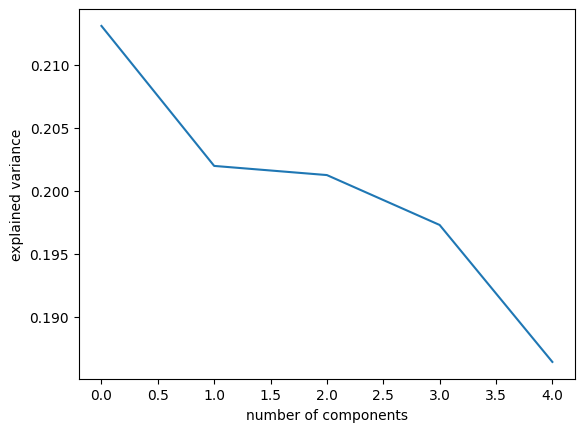

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

No principal components will be removed per scree plot exhibiting no characteristics to satisfy elbow rule

In [22]:
continuous_features = data[continuous]

##Categorical Variables

Create correlation heat map and matrix to observe for multi-colinearity among categorical feature variables

,Churn_Yes,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Techie_Yes,Contract_One year,Contract_Two Year,...,OnlineSecurity_Yes,OnlineBackup_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,PaperlessBilling_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes
Churn_Yes,1.000000,-0.007731,-0.017331,0.014854,0.010622,0.028061,-0.003341,0.066722,-0.139043,-0.178337,...,-0.013540,0.050508,-0.006693,0.029914,-0.009626,0.007030,0.289262,0.230151,0.018838,0.056489
Marital_Married,-0.007731,1.000000,-0.239680,-0.244089,-0.245075,0.002252,-0.003630,0.006222,-0.001681,-0.012827,...,-0.019302,0.006596,0.008730,0.001956,-0.010665,0.003075,-0.000244,-0.010649,0.011755,-0.001622
Marital_Never Married,-0.017331,-0.239680,1.000000,-0.247636,-0.248636,-0.012080,0.001370,-0.021187,0.003000,0.009591,...,0.011327,0.000317,0.014629,-0.003007,-0.018554,0.011516,-0.007809,-0.003082,-0.001302,-0.008079
Marital_Separated,0.014854,-0.244089,-0.247636,1.000000,-0.253210,0.002276,-0.002529,0.000567,-0.000822,0.008811,...,0.000413,-0.005266,-0.006457,0.004550,0.014713,-0.001842,0.008058,0.009127,-0.008885,0.018421
Marital_Widowed,0.010622,-0.245075,-0.248636,-0.253210,1.000000,-0.008274,0.008571,0.021740,0.008501,0.000004,...,-0.000444,0.010316,-0.000750,-0.004608,0.002260,0.012493,-0.012542,0.002931,0.003532,0.000480
Gender_Male,0.028061,0.002252,-0.012080,0.002276,-0.008274,1.000000,-0.146092,-0.009921,-0.011889,0.014225,...,0.016105,-0.008713,0.009777,0.012257,-0.022103,-0.006275,0.011291,0.015094,-0.011996,0.018678
Gender_Nonbinary,-0.003341,-0.003630,0.001370,-0.002529,0.008571,-0.146092,1.000000,-0.010303,0.003993,-0.002185,...,-0.005008,0.029316,-0.006749,0.003522,-0.006177,-0.009298,-0.007936,0.006844,0.007391,-0.016523
Techie_Yes,0.066722,0.006222,-0.021187,0.000567,0.021740,-0.009921,-0.010303,1.000000,0.005302,-0.006235,...,-0.015300,0.004540,0.012692,0.000834,-0.013047,0.001311,-0.004298,0.003436,0.007391,0.021346
Contract_One year,-0.139043,-0.001681,0.003000,-0.000822,0.008501,-0.011889,0.003993,0.005302,1.000000,-0.293243,...,-0.000346,-0.001559,-0.002929,-0.015680,0.013809,-0.014659,-0.001904,0.022054,-0.000634,0.007450
Contract_Two Year,-0.178337,-0.012827,0.009591,0.008811,0.000004,0.014225,-0.002185,-0.006235,-0.293243,1.000000,...,0.017357,-0.004381,0.002483,0.005017,-0.008430,0.021101,-0.007049,0.002020,-0.003726,-0.005658


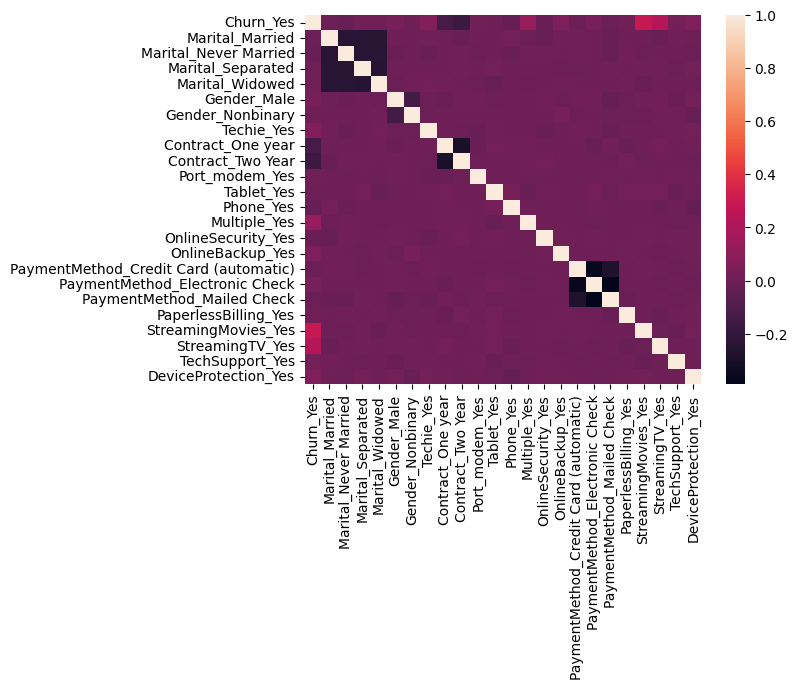

In [23]:
correlation_heatmap = hot_categorical_data.corr()
sns.heatmap(correlation_heatmap, annot=False)
correlation_heatmap

Fit a MCA object to the current set of features

In [24]:
mca = MCA(n_components=len(hot_categorical))
mca.set_output(transform='pandas').fit_transform(hot_categorical_data)
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.061,6.08%,6.08%
1,0.059,5.91%,11.98%
2,0.054,5.45%,17.43%
3,0.054,5.37%,22.81%
4,0.052,5.24%,28.05%
5,0.052,5.20%,33.25%
6,0.051,5.12%,38.36%
7,0.048,4.79%,43.15%
8,0.044,4.36%,47.51%


Visualize Scree Plot using Eigen values

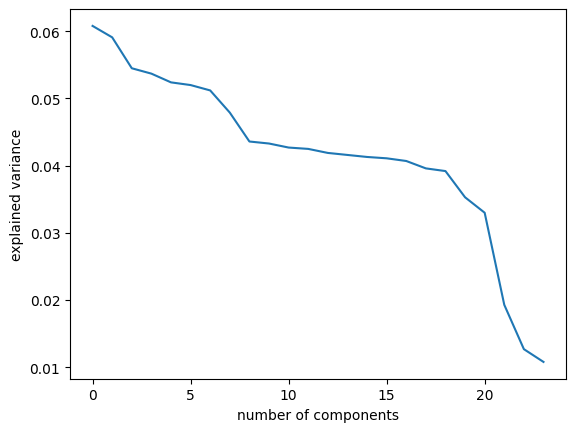

In [25]:
pct_var = []
for percent in mca.eigenvalues_summary['% of variance']:
  pct_var.append(float(percent.strip('%')) / 100)
plt.plot(pct_var)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Refit the MCA model to 20 components per the elbow rule to observe the change in total variance accounted for by the reduced number of features along with a scree plot to visualize the changes

In [26]:
mca_final = MCA(n_components=20)
mca_features = mca_final.set_output(transform='pandas').fit_transform(hot_categorical_data)
mca_final.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.061,6.08%,6.08%
1,0.059,5.91%,11.98%
2,0.054,5.45%,17.43%
3,0.054,5.37%,22.81%
4,0.052,5.24%,28.05%
5,0.052,5.20%,33.25%
6,0.051,5.12%,38.36%
7,0.048,4.79%,43.15%
8,0.044,4.36%,47.51%


Observe scree plot after feature reduction to confirm changes

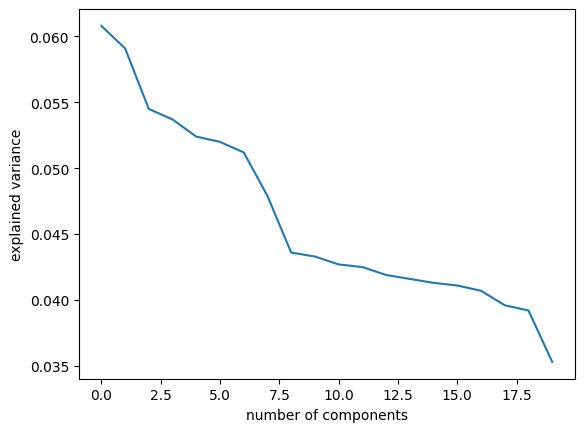

In [27]:
final_pct_var = []
for percent in mca_final.eigenvalues_summary['% of variance']:
  final_pct_var.append(float(percent.strip('%')) / 100)
plt.plot(final_pct_var)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Upon completion of the feature reduction process using Multi Correspondance Analysis, there remains 20 of the original 23 components from the original feature set post hot-encoding and accounts for 92.41% of the variance found within the original 23 component dataset.

'SelectKBest' will be used to reduce the original set of categorical variables down to 20 components and will be saved to the 'categorical_features' variable.

In [28]:
categorical_features = SelectKBest(f_regression, k = 20).set_output(transform='pandas').fit_transform(hot_categorical_data, y)
categorical_features

,Churn_Yes,Marital_Married,Marital_Never Married,Gender_Male,Gender_Nonbinary,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes
0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0
2,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0
3,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1
9996,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,1,0,1
9997,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0
9998,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0


Combine PCA features and MCA features into one dataset in preparation for model fitting

In [29]:
final_features = pd.concat([categorical_features, continuous_features], axis=1)


Fit Linear Model to Data

In [30]:
X = sm.add_constant(final_features)
y = data[target]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.669e+04
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:03:15   Log-Likelihood:                -23084.
No. Observations:               10000   AIC:                         4.622e+04
Df Residuals:                    9974   BIC:                         4.641e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -6.3182      0.217    -29.094      0.000      -6.744      -5.893
Churn_Yes                                -1.6387      0.075    -21.793      0.000      -1.786      -1.491
Marital_Married                          -0.0605      0.064     -0.946      0.344      -0.186       0.065
Marital_Never Married                    -0.0194      0.063     -0.306      0.760      -0.144       0.105
Gender_Male                              -0.7969      0.049    -16.119      0.000      -0.894      -0.700
Gender_Nonbinary                          0.2596      0.164      1.581      0.114      -0.062       0.581
Techie_Yes                                0.0771      0.066      1.178      0.239      -0.051       0.206
Contract_One year                        -0.4401      0.065     -6.768      0.000      -0.568      -0.313
Contract_Two Year                        -0.4552      0.062     -7.340      0.000      -0.577      -0.334
Port_modem_Yes                            0.0310      0.049      0.635      0.525      -0.065       0.127
Phone_Yes                                 0.0177      0.084      0.210      0.833      -0.147       0.182
Multiple_Yes                             -1.7365      0.071    -24.423      0.000      -1.876      -1.597
OnlineSecurity_Yes                       -1.0370      0.051    -20.273      0.000      -1.137      -0.937
OnlineBackup_Yes                         -1.7443      0.060    -28.901      0.000      -1.863      -1.626
PaymentMethod_Credit Card (automatic)     0.1510      0.074      2.032      0.042       0.005       0.297
PaymentMethod_Electronic Check            0.1149      0.067      1.726      0.084      -0.016       0.245
PaymentMethod_Mailed Check                0.0736      0.073      1.013      0.311      -0.069       0.216
StreamingMovies_Yes                      -3.7685      0.096    -39.134      0.000      -3.957      -3.580
StreamingTV_Yes                          -3.7116      0.083    -44.816      0.000      -3.874      -3.549
TechSupport_Yes                          -0.5158      0.054     -9.611      0.000      -0.621      -0.411
DeviceProtection_Yes                     -1.3399      0.053    -25.300      0.000      -1.444      -1.236
Age                                       0.0410      0.001     34.800      0.000       0.039       0.043
Income                                -1.669e-06   8.65e-07     -1.929      0.054   -3.36e-06    2.69e-08
Outage_sec_perweek                        0.0083      0.008      1.015      0.310      -0.008       0.024
Bandwidth_GB_Year                         0.0119   1.33e-05    898.411      0.000       0.012       0.012
MonthlyCharge                             0.0318      0.002     20.590      0.000       0.029       0.035
=========

Residuals Plot

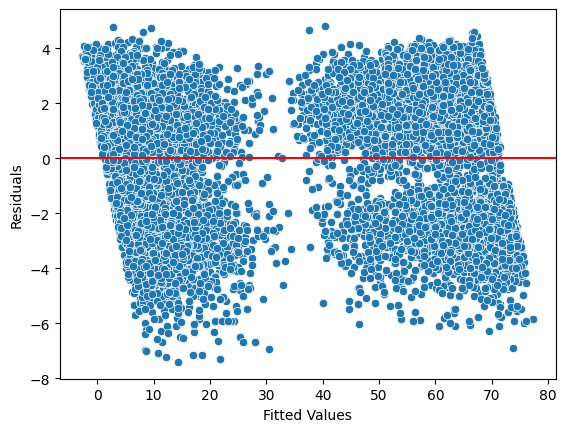

In [31]:
fitted = model.predict(X)
residuals = data[target[0]] - fitted
residual_data = pd.DataFrame({'Fitted Values': fitted, 'Residuals': residuals})
sns.scatterplot(data= residual_data, x='Fitted Values', y='Residuals')
plt.axhline(y=0, color="red")
plt.show();

Residual Standard Error Equation

In [32]:
print(f'Root Mean Squared Residuals: {np.sqrt(model.mse_resid)}')

Root Mean Squared Residuals: 2.4370860157313725


#Model Summary Analysis
Again referring to the R-squared value, the final model with a reduced feature set had an R-squared value remaining at .992. With this being the case, the fact that the model is capable of matching the accuracy of the initial model while requiring 3 less features within it's feature set is ideal.

The residual standard error reflected a similiar trend for this final model in comparison to the initial model remaining at 2.43. With no drop in performance while gaining the optimization of requiring less features in order to achieve these results, it can be concluded that the feature reduction process was successful.

The statistical and practical significance of this model is that since the model is capable of expressing 99.2% of the variance within the collected dataset. Furthermore, in observation of the model summary, there can be conclusions drawn regarding which aspects of patient care can be improved or optimized in respect the tenure of customers in accordance with their respective coefficients. Based on the information gathered from this model, Teleco can prioritize aspects of their customer services in accordance with these coefficient values to have greater control over the desired tenure of their customers.

#Model Limitations
Some key limitations of the data analysis is that although this model has been reduced to a handful of variables, the assumption of a linear relationship for this prediction likely does not accurately represent the true correlations and relationships which are present within the dataset.

Taking into consideration that this model only takes into account what is provided within the dataset, there are surely other factors pertaining to information outside of what this dataset contains. Examples of this could be things such as deals that are presented by other coompetitors during certain times of the year as well as economic impacts which would surely be taken into account when customers make the decision to stay or move on from their service. The conclusions that have been drawn from this research - though accurate to the methods implemented – must be taken with a grain of salt as the complexity of what is being explored surely is greater than a linear relationship.